In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data=pd.read_csv('Data/3_CSE-CIC-IDS2018.csv')

In [4]:
train_data.head()

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,3389,1665875,8,7,1128,1581.0,661,0,141.00,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,53,67765,2,2,94,268.0,47,47,47.00,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,0,213190,5,0,0,0.0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,41967,86370853,2,0,0,0.0,0,0,0.00,...,20,0.0,0.0,0.0,0.0,86400000.0,0.0,86400000.0,86400000.0,Benign
4,4,80,5113386,4,4,97,231.0,97,0,24.25,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
# remove attribute 'difficulty_level'
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)
train_data.shape

(246730, 73)

In [6]:
# number of attack labels 
train_data['Label'].value_counts()

Benign                      75000
Infilteration               40000
DoS attacks-Hulk            20000
Bot                         20000
DoS attacks-SlowHTTPTest    20000
DDOS attack-HOIC            15000
FTP-BruteForce              15000
SSH-Bruteforce              15000
DoS attacks-GoldenEye       15000
DoS attacks-Slowloris       10000
DDOS attack-LOIC-UDP         1730
Name: Label, dtype: int64

In [9]:
def change_label(df):
  df.Label.replace(['Infilteration','DoS attacks-Hulk','Bot','DoS attacks-SlowHTTPTest','DDOS attack-HOIC','FTP-BruteForce','SSH-Bruteforce','DoS attacks-GoldenEye','DoS attacks-Slowloris','DDOS attack-LOIC-UDP'],'DDoS',inplace=True)

In [10]:
change_label(train_data)

In [20]:
train_data = train_data[0:50000]

In [21]:
# distribution of attack classes
train_data.Label.value_counts()

DDoS      25000
Benign    25000
Name: Label, dtype: int64

In [22]:
data = train_data.copy()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 73 columns):
Dst Port             50000 non-null int64
Flow Duration        50000 non-null int64
Tot Fwd Pkts         50000 non-null int64
Tot Bwd Pkts         50000 non-null int64
TotLen Fwd Pkts      50000 non-null int64
TotLen Bwd Pkts      50000 non-null float64
Fwd Pkt Len Max      50000 non-null int64
Fwd Pkt Len Min      50000 non-null int64
Fwd Pkt Len Mean     50000 non-null float64
Fwd Pkt Len Std      50000 non-null float64
Bwd Pkt Len Max      50000 non-null int64
Bwd Pkt Len Min      50000 non-null int64
Bwd Pkt Len Mean     50000 non-null float64
Bwd Pkt Len Std      50000 non-null float64
Flow IAT Mean        50000 non-null float64
Flow IAT Std         50000 non-null float64
Flow IAT Max         50000 non-null float64
Flow IAT Min         50000 non-null float64
Fwd IAT Tot          50000 non-null float64
Fwd IAT Mean         50000 non-null float64
Fwd IAT Std          50000 no

In [24]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.

data['Label']= label_encoder.fit_transform(data['Label'])

data['Label'].unique()

array([0, 1], dtype=int64)

In [25]:
data.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3389,1665875,8,7,1128,1581.0,661,0,141.00,222.623321,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,53,67765,2,2,94,268.0,47,47,47.00,0.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,213190,5,0,0,0.0,0,0,0.00,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,41967,86370853,2,0,0,0.0,0,0,0.00,0.000000,...,20,0.0,0.0,0.0,0.0,86400000.0,0.0,86400000.0,86400000.0,0
4,80,5113386,4,4,97,231.0,97,0,24.25,48.500000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
X = data.drop(["Label"],axis =1)
y = data["Label"]

# CFS

In [27]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [28]:
selector = SelectPercentile(mutual_info_classif, percentile=30)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

(50000, 22)

In [29]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['Dst Port',
 'Flow Duration',
 'TotLen Fwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Bwd Pkt Len Mean',
 'Flow IAT Mean',
 'Flow IAT Max',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Max',
 'Fwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Subflow Fwd Byts',
 'Subflow Bwd Byts']

In [30]:
df = data[['Dst Port',
         'Flow Duration',
         'TotLen Fwd Pkts',
         'Fwd Pkt Len Max',
         'Fwd Pkt Len Mean',
         'Bwd Pkt Len Mean',
         'Flow IAT Mean',
         'Flow IAT Max',
         'Fwd IAT Tot',
         'Fwd IAT Mean',
         'Fwd IAT Max',
         'Fwd Header Len',
         'Fwd Pkts/s',
         'Bwd Pkts/s',
         'Pkt Len Max',
         'Pkt Len Mean',
         'Pkt Len Std',
         'Pkt Len Var',
         'Pkt Size Avg',
         'Fwd Seg Size Avg',
         'Subflow Fwd Byts',
         'Subflow Bwd Byts',
             'Label']]
df.to_csv('cic2018_proc.csv')

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40000, 22), (40000,), (10000, 22), (10000,))

In [60]:
ML_Model = []
accuracy = []
f1score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))    
    f1score.append(round(d, 3))

In [72]:
ML_Model1 = []
accuracy1 = []
f1score1 = []
recall1 = []
precision1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    precision1.append(round(b, 3))
    recall1.append(round(c, 3))    
    f1score1.append(round(d, 3))

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(random_state=10)

# fit the model 
rf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [63]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = tree.predict(X_test)


dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [64]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1)

# ExtraTree

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

# instantiate the model 
et = ExtraTreesClassifier(random_state=10)

# fit the model 
et.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = et.predict(X_test)

et_acc = accuracy_score(y_pred, y_test)
et_prec = precision_score(y_pred, y_test,average='weighted')
et_rec = recall_score(y_pred, y_test,average='weighted')
et_f1 = f1_score(y_pred, y_test,average='weighted')

In [65]:
storeResults('ExtraTree',et_acc,et_prec,et_rec,et_f1)

# Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
nb = GaussianNB()

# fit the model 
nb.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')

In [66]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1)

# SVM

In [39]:
from sklearn.svm import SVC

# instantiate the model 
svm = SVC(probability=True)

# fit the model 
svm.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test,average='weighted')
svc_rec = recall_score(y_pred, y_test,average='weighted')
svc_f1 = f1_score(y_pred, y_test,average='weighted')

In [67]:
storeResults('SVC',svc_acc,svc_prec,svc_rec,svc_f1)

# Voting Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[250],
    "max_depth":[200]
    
}

from sklearn.model_selection import GridSearchCV
forest = GridSearchCV(rfc,parameters,cv=10)

clf2 = DecisionTreeClassifier(random_state=1000)

eclf1 = VotingClassifier(estimators=[('rf-parameter', forest), ('dt', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [93]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [42]:
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', forest),('mlp', MLPClassifier(random_state=1, max_iter=3000))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)

stac_acc = accuracy_score(y_pred, y_train)
stac_prec = precision_score(y_pred, y_train,average='weighted')
stac_rec = recall_score(y_pred, y_train,average='weighted')
stac_f1 = f1_score(y_pred, y_train,average='weighted')

In [94]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [95]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score
                      })

In [96]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,1.000,1.000,1.000,1.000
1,Decision Tree,1.000,1.000,1.000,1.000
2,ExtraTree,1.000,1.000,1.000,1.000
3,Naive Bayes,0.594,0.924,0.594,0.676
4,SVC,0.575,0.937,0.575,0.670
5,Voting Classifier,1.000,1.000,1.000,1.000
6,Stacking Classifier,1.000,1.000,1.000,1.000


# Modelling

In [97]:
import joblib
#filename = 'model.sav'
joblib.dump(eclf1, 'model_2018.sav')

['model_2018.sav']

# PCA 

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
 
x_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

# PCA RF

In [46]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf1 = RandomForestClassifier(random_state=10)

# fit the model 
rf1.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = rf1.predict(x_test)

rf1_acc = accuracy_score(y_pred, y_test)
rf1_prec = precision_score(y_pred, y_test,average='weighted')
rf1_rec = recall_score(y_pred, y_test,average='weighted')
rf1_f1 = f1_score(y_pred, y_test,average='weighted')

In [73]:
storeResults1('PCA Random Forest',rf1_acc,rf1_prec,rf1_rec,rf1_f1)

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree1 = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree1.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = tree1.predict(x_test)


dt1_acc = accuracy_score(y_pred, y_test)
dt1_prec = precision_score(y_pred, y_test,average='weighted')
dt1_rec = recall_score(y_pred, y_test,average='weighted')
dt1_f1 = f1_score(y_pred, y_test,average='weighted')

In [74]:
storeResults1('PCA Decision Tree',dt1_acc,dt1_prec,dt1_rec,dt1_f1)

# Extra Tree

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

# instantiate the model 
et = ExtraTreesClassifier(random_state=10)

# fit the model 
et.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = et.predict(x_test)

et1_acc = accuracy_score(y_pred, y_test)
et1_prec = precision_score(y_pred, y_test,average='weighted')
et1_rec = recall_score(y_pred, y_test,average='weighted')
et1_f1 = f1_score(y_pred, y_test,average='weighted')

In [75]:
storeResults1('PCA ExtraTree',et1_acc,et1_prec,et1_rec,et1_f1)

# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
nb = GaussianNB()

# fit the model 
nb.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = nb.predict(x_test)

nb1_acc = accuracy_score(y_pred, y_test)
nb1_prec = precision_score(y_pred, y_test,average='weighted')
nb1_rec = recall_score(y_pred, y_test,average='weighted')
nb1_f1 = f1_score(y_pred, y_test,average='weighted')

In [76]:
storeResults1('PCA Naive Bayes',nb1_acc,nb1_prec,nb1_rec,nb1_f1)

# PCA SVM

In [50]:
from sklearn.svm import SVC

# instantiate the model 
svm = SVC(probability=True)

# fit the model 
svm.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm.predict(x_test)

svc1_acc = accuracy_score(y_pred, y_test)
svc1_prec = precision_score(y_pred, y_test,average='weighted')
svc1_rec = recall_score(y_pred, y_test,average='weighted')
svc1_f1 = f1_score(y_pred, y_test,average='weighted')

In [77]:
storeResults1('PCA SVM',svc1_acc,svc1_prec,svc1_rec,svc1_f1)

# Voting Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[250],
    "max_depth":[200]
    
}

from sklearn.model_selection import GridSearchCV
forest = GridSearchCV(rfc,parameters,cv=10)

clf2 = DecisionTreeClassifier(random_state=1000)

eclf2 = VotingClassifier(estimators=[('rf-parameter', forest), ('dt', clf2)], voting='soft')
eclf2.fit(x_train, y_train)
y_pred = eclf2.predict(x_test)

vot1_acc = accuracy_score(y_pred, y_test)
vot1_prec = precision_score(y_pred, y_test,average='weighted')
vot1_rec = recall_score(y_pred, y_test,average='weighted')
vot1_f1 = f1_score(y_pred, y_test,average='weighted')

In [103]:
storeResults1('PCA Voting Classifier',vot1_acc,vot1_prec,vot1_rec,vot1_f1)

# Stacking Classifier

In [52]:
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', forest),('mlp', MLPClassifier(random_state=1, max_iter=30))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))


clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_train)

stac1_acc = accuracy_score(y_pred, y_train)
stac1_prec = precision_score(y_pred, y_train,average='weighted')
stac1_rec = recall_score(y_pred, y_train,average='weighted')
stac1_f1 = f1_score(y_pred, y_train,average='weighted')

In [102]:
storeResults1('PCA Stacking Classifier',stac1_acc,stac1_prec,stac1_rec,stac1_f1)

# Comparison

In [104]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                        'Precision': precision1,
                        'Recall'   : recall1,
                        'F1-Score': f1score1
                      })

In [105]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,PCA Random Forest,0.999,0.999,0.999,0.999
1,PCA Decision Tree,0.999,0.999,0.999,0.999
2,PCA ExtraTree,0.999,0.999,0.999,0.999
3,PCA Naive Bayes,0.603,0.918,0.603,0.679
4,PCA SVM,0.575,0.937,0.575,0.670
5,PCA Stacking Classifier,1.000,1.000,1.000,1.000
6,PCA Voting Classifier,0.999,0.999,0.999,0.999


# Graph

# Original

In [106]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# ACcuracy

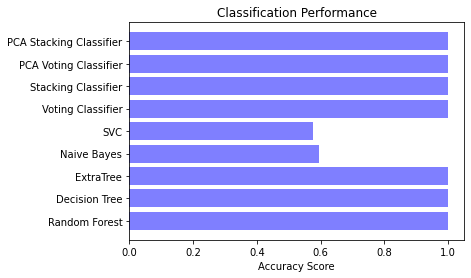

In [107]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

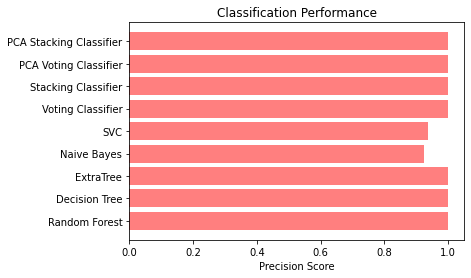

In [108]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

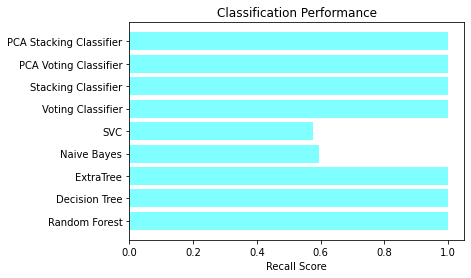

In [109]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

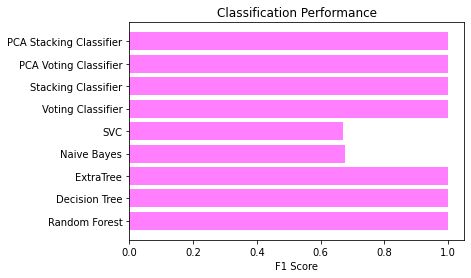

In [110]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# PCA

In [111]:
classifier = ML_Model1
y_pos = np.arange(len(classifier))

# Accuracy

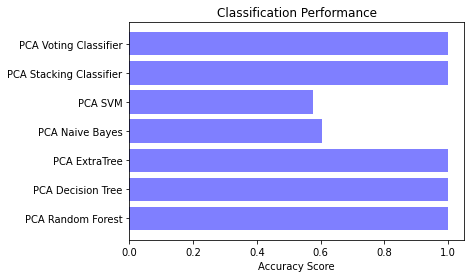

In [112]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

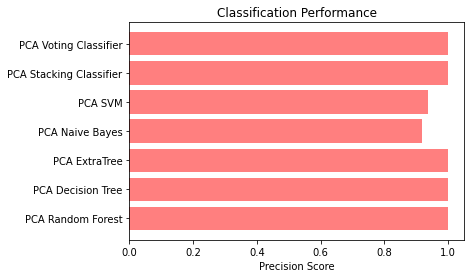

In [113]:
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

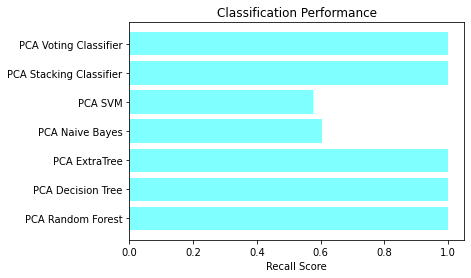

In [114]:
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

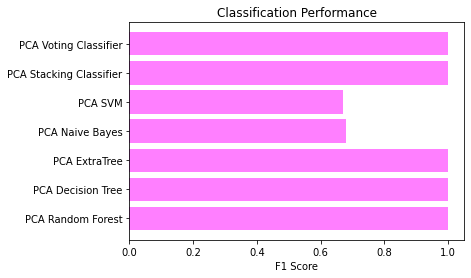

In [116]:
plt2.barh(y_pos, f1score1, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()